

---



---


# **CHURN PREDICTION PROJECT**

The objective of this project aims to predict whether a customer will drop their contract with a telecommunications company



---



---


# **DATA AUDIT, EXPLORATION AND CLEANING**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Import the data
df_test = pd.read_csv(r"https://assets-datascientest.s3-eu-west-1.amazonaws.com/de/total/churn.csv")

# Display the number of rows and columns of the dataset
print("The 'CHURN' dataset consists in " + str(df_test.shape[0]) + " rows and " + str(df_test.shape[1]) + " columns")

The 'CHURN' dataset consists in 5986 rows and 21 columns


In [ ]:
# Preview of the 5 first rows of the dataset
df_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [ ]:
# Construct a dataframe with information about unique values 
nbrUniqueValueList = []
uniqueValueList = []
for col in df_test:
  nbrUniqueValue = df_test[col].nunique()
  uniqueValue = df_test[col].unique()
  nbrUniqueValueList.append(nbrUniqueValue)
  uniqueValueList.append(uniqueValue)

table_unique = pd.DataFrame({
  'Column Name': list(df_test.columns),  
  'Number of unique values': nbrUniqueValueList,
  'Unique values': uniqueValueList
})

# Display a preview of information about unique values
table_unique

,Column Name,Number of unique values,Unique values
0,customerID,5986,"[7010-BRBUU, 9688-YGXVR, 9286-DOJGF, 6994-KERX..."
1,gender,2,"[Male, Female]"
2,SeniorCitizen,2,"[0, 1]"
3,Partner,2,"[Yes, No]"
4,Dependents,2,"[Yes, No]"
5,tenure,73,"[72, 44, 38, 4, 2, 70, 33, 1, 39, 55, 52, 30, ..."
6,PhoneService,2,"[Yes, No]"
7,MultipleLines,3,"[Yes, No, No phone service]"
8,InternetService,3,"[No, Fiber optic, DSL]"
9,OnlineSecurity,3,"[No internet service, No, Yes]"


In [ ]:
# Display the information of the data columns 
df_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


**NOTE :** Most of the variables are of categorical type with a number of unique value between 2 and 4. The variable "TotalCharges" seems to be of numerical type (with 5611 unique values) but some values as categorical, so we need to redefine the type of those variables. To keep consistent to the others categorical variables, 'SeniorCitizens' is also redefined as categorical type.

In [ ]:
# Convert "SeniorCitizens" type as object
df_test = df_test.astype({'SeniorCitizen': np.str})
df_test['SeniorCitizen'] = df_test['SeniorCitizen'].replace({"0" : "No", "1" : "Yes"})

# Convert "TotalCharges" type to float
try:  
  df_test = df_test.astype({'TotalCharges': np.float})
except Exception as error: 
    print(error)

could not convert string to float: 


**NOTE :** The attempt to redefine the type of the variable "TotalCharge" fails and returns the error message "could not convert string to float: ". That is means one or several values contain an empty string or containing characters (in our case, it corresponds to whitespace character according to the error message returned).  

In [ ]:
empty_space_idx = []

for index, char in enumerate(df_test['TotalCharges']):
  if len(char) == 0 | char.isspace():
    empty_space_idx.append(index)
    
print("The 'TotalCharges' columns contains " + str(len(empty_space_idx)) + " empty values or containing only whitespace characters.")

print("Row index of concerned values : " + str(empty_space_idx))

The 'TotalCharges' columns contains 10 empty values or containing only whitespace characters.
Row index of concerned values : [356, 634, 2771, 3086, 3255, 4326, 5375, 5382, 5695, 5951]


**NOTE :** The number of empty values or containing only whitespace characters is not important. So we can drop all rows concern and convert the column type to 'float'. 

In [ ]:
df_test = df_test.drop(df_test.index[empty_space_idx])

try:  
  df_test = df_test.astype({'TotalCharges': np.float})
except Exception as error: 
    print(error)

# Display the information of the data columns 
df_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5976 non-null   object 
 1   gender            5976 non-null   object 
 2   SeniorCitizen     5976 non-null   object 
 3   Partner           5976 non-null   object 
 4   Dependents        5976 non-null   object 
 5   tenure            5976 non-null   int64  
 6   PhoneService      5976 non-null   object 
 7   MultipleLines     5976 non-null   object 
 8   InternetService   5976 non-null   object 
 9   OnlineSecurity    5976 non-null   object 
 10  OnlineBackup      5976 non-null   object 
 11  DeviceProtection  5976 non-null   object 
 12  TechSupport       5976 non-null   object 
 13  StreamingTV       5976 non-null   object 
 14  StreamingMovies   5976 non-null   object 
 15  Contract          5976 non-null   object 
 16  PaperlessBilling  5976 non-null   object 


**NOTE :** Now our dataset is clean and ready for data analysis and visualization part. We have 18 variables of categorical type and 3 variables of numerical type. 



---

# **DATA ANALYSIS AND VISUALIZATION**


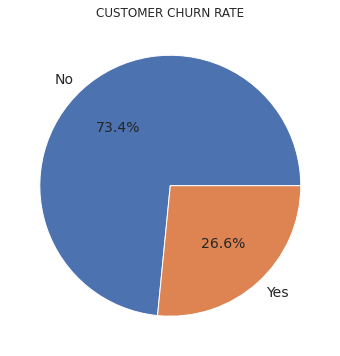

In [ ]:
churnCounts = df_test['Churn'].value_counts(sort = True)
churnLabels = np.unique(df_test['Churn'])

# Visualize the target variable distribution ("Churn")
plt.figure(figsize = (6,6))
plt.title("CUSTOMER CHURN RATE")
plt.pie(churnCounts, labels = churnLabels, autopct='%1.1f%%',textprops={'fontsize': 14})
plt.show()

**NOTE :** Among the 5976 customers listed, a little over a quarter have recently terminated their contract with their telecommunication company.

In [ ]:
# Display the statistical summary of the dataframe (numerical type variables)
df_test.describe()

,tenure,MonthlyCharges,TotalCharges
count,5976.000000,5976.000000,5976.000000
mean,32.523092,64.846687,2298.060617
std,24.500858,30.107576,2274.127165
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,404.312500
50%,29.000000,70.425000,1412.150000
75%,56.000000,89.900000,3846.962500
max,72.000000,118.750000,8684.800000


**NOTE :** The values of the numerical dataset seem consistent (without outliers). The data dispersion for each parameter is quite important. Also we can note that one in two customers pays an invoice over 70$ per month, and a quarter remains under contract for less than a year.

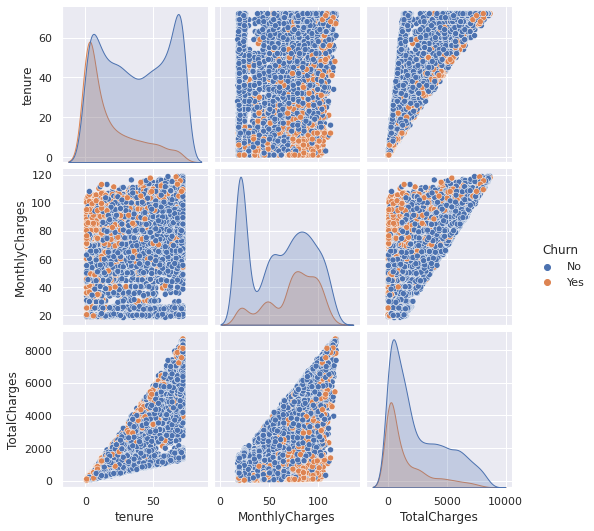

In [ ]:
# Plot pairwise relationships in a dataset
pp = sns.pairplot(df_test, hue = 'Churn')

**NOTE :** Most of the customers who have churned recently have paid important monthly charges. Globally, they remained under contract less than a year. As the total charges is related to these two variables (the more the customer remains under contract, the more the total charges increase), it make sense that the total charges for these people is low.   

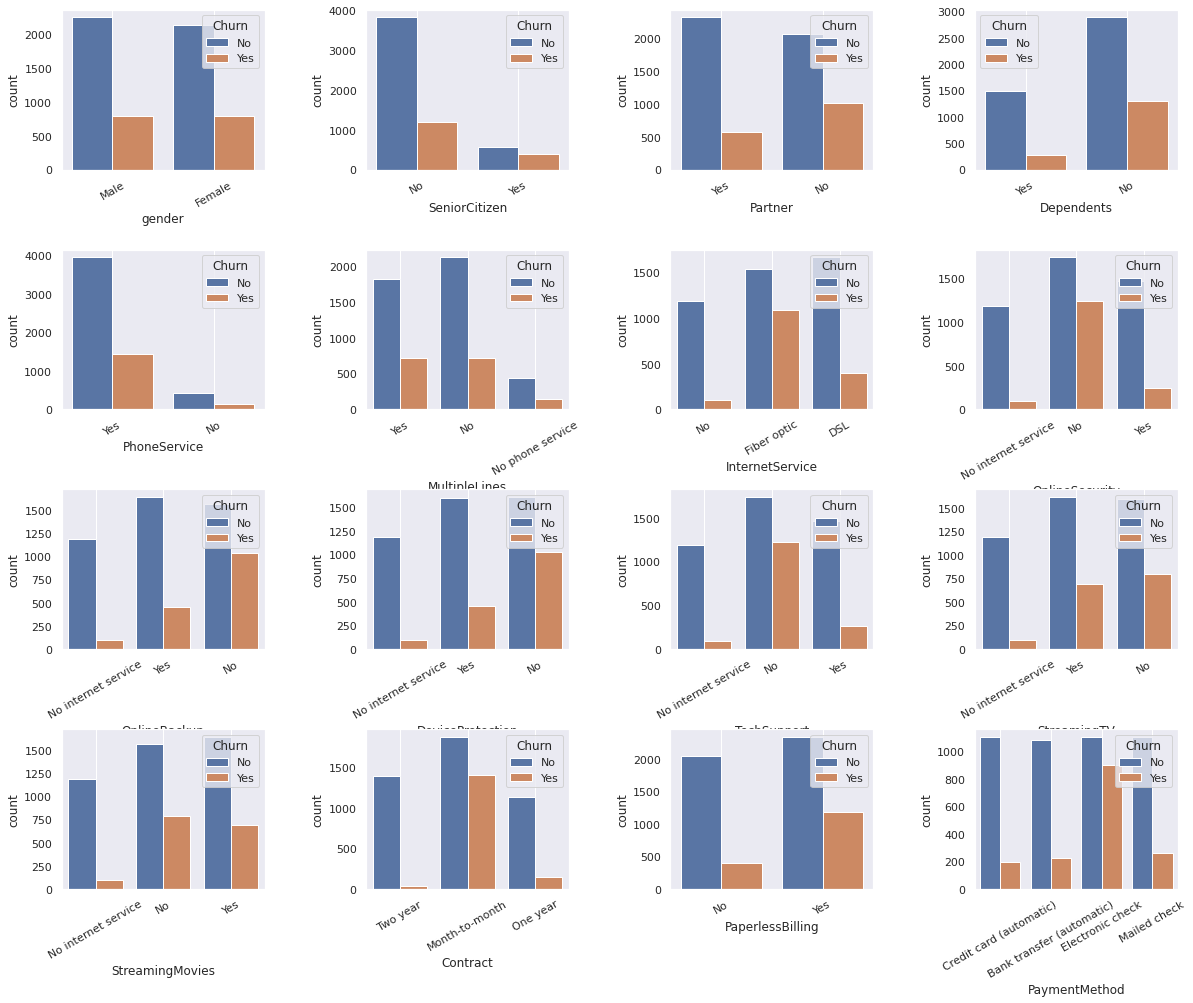

In [ ]:
plt.figure(figsize=(20, 25))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

categorical_columns1 = list(df_test.select_dtypes(["object"]).columns)
categorical_columns1.remove('customerID')
categorical_columns1.remove('Churn')

for i in range(len(categorical_columns1)):
    plt.subplot(6, 4, i+1)
    fig = sns.countplot(df_test[categorical_columns1[i]], hue=df_test['Churn'])
    fig.tick_params(axis='x', rotation=30)
    fig.grid()

plt.show()

**NOTE :** The analysis of the categorical variables distribution indicates that the gender is balanced, and so this variable can be dropped from our dataset as it does not impact the target variable (i.e. 'Churn'). For the rest of the variables, distributions are not homogeneous and have to be considered in the model training evaluation. We can note also that the typical profile of the customer who churn is, from a social point of view, a "junior" citizen without partner and independant. These people have generally subscribed to a combination "Phone+Internet" month-to-month contract without extra internet services (online security, online backup, device protection and technical support). They have generally choosen the electronic invoice (i.e. PaperlessBilling) with electronic check payment method. The fact that they used streaming services (TV and/or Movies) does not seem to affect their contract termination.     

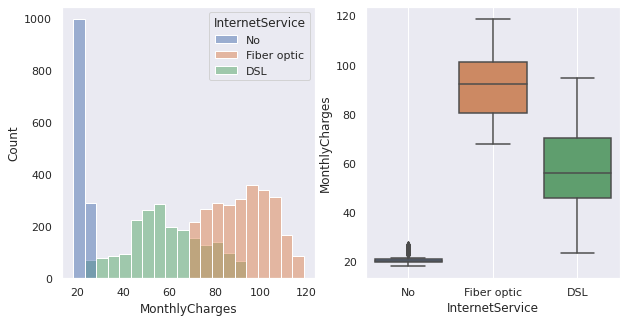

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig = sns.histplot(ax=axes[0], x=df_test['MonthlyCharges'], hue=df_test['InternetService'], bins=20) 
fig.grid()

fig = sns.boxplot(ax=axes[1], x=df_test['InternetService'], y=df_test['MonthlyCharges'])
fig.grid()

**NOTE :** As previously shown, the monthly charge has a multimodal distribution. Each mode can easily be associated to the Internet service values (No, Fiber Optic or DSL). It make sense that more the service is important, higher is the charge. Also as the typical customer who resiliated their contract has a Fiber Optic INternet service, it makes sense their monthly charges are important.

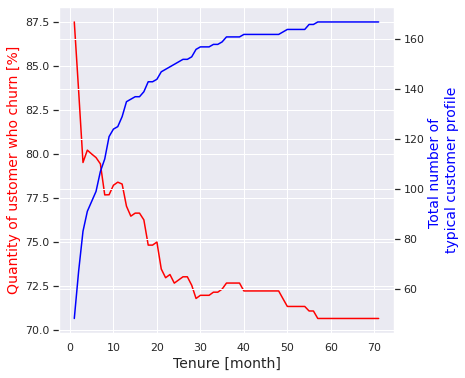

In [ ]:
lchurn = []
dataLength = []
for tenureValue in range(1,72): 
  df_typicalChurnProfile = df_test[(df_test['SeniorCitizen'] == 'No') & 
                                 (df_test['Partner'] == 'No') &
                                 (df_test['Dependents'] == 'No') &
                                 (df_test['PhoneService'] == 'Yes') &
                                 (df_test['InternetService'] == 'Fiber optic') & 
                                 (df_test['OnlineSecurity'] == 'No') &
                                 (df_test['OnlineBackup'] == 'No') &
                                 (df_test['DeviceProtection'] == 'No') &
                                 (df_test['TechSupport'] == 'No') & 
                                 (df_test['PaperlessBilling'] == 'Yes') &
                                 (df_test['PaymentMethod'] == 'Electronic check') &
                                 (df_test['tenure'] <= tenureValue)]

  dataLength.append(len(df_typicalChurnProfile['Churn']))
  churnCounts = df_typicalChurnProfile['Churn'].value_counts(normalize=True)
  lchurn.append(churnCounts[0]*100)

sns.set()
plt.figure(figsize=(6,6))
ax = plt.subplot()
plt.plot(range(1,72), lchurn, color="red")
ax.set_xlabel("Tenure [month]", fontsize = 14)
ax.set_ylabel("Quantity of ustomer who churn [%]",color="red",fontsize=14)
ax2 = ax.twinx()
plt.plot(range(1,72), dataLength, color="blue")
ax2.set_ylabel("Total number of \ntypical customer profile",color="blue",fontsize=14)
plt.show()

**NOTE :** Isolating the typical customer profile who stopped their contract, we can note that 80% of them resiliated their contract under the 5 first months. Also whatever the tenure, more than 2 in 3 customers with this kind of profile have stopped their contract. 

# **TRAINING AND EVALUATION OF MACHINE LEARNING MODELS**




In [ ]:
# Removing non significant variables
df_test = df_test.drop(columns=['customerID', 'gender'], axis=1)

# Data splitting (response : y_init = "Churn" variable, predictors : X_init = others variables)
target_name = "Churn"
y_init = df_test[target_name]
X_init = df_test.drop(columns=[target_name]) 

**DATA BALANCING : RANDOM OVER SAMPLING TECHNIQUE**

From litterature, it is indicated that most models trained on unbalanced data could have a bias towards predicting the larger class and, in many cases, may ignore the smaller class altogether. As a result, the instances belonging to the smaller classes are typically misclassified more often than those belonging to the larger class. A widely adopted technique for dealing with unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling). Several resampling techniques exist, however only one technique is used here and applied to our dataset : the RandomOverSampler.

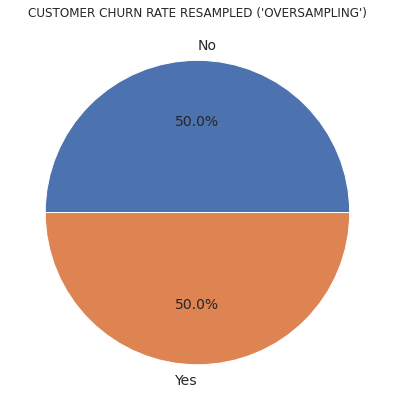

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_init,y_init)

churnCounts = y_over.value_counts(sort = True)

# Visualize the target variable distribution ("Churn") after resampling
plt.figure(figsize = (7,7))
plt.title("CUSTOMER CHURN RATE RESAMPLED ('OVERSAMPLING')")
plt.pie(churnCounts, labels = churnLabels, autopct='%1.1f%%',textprops={'fontsize': 14})
plt.show()

In [ ]:
# Use of "One Hot Encoding" for categorical variables and "Standard Scaler" for standardization of numerical ones
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import make_column_selector

# Split numerical and categorical variables into two datasets
numerical_columns_selector = make_column_selector(dtype_exclude=object) 
categorical_columns_selector = make_column_selector(dtype_include=object)
numerical_columns = numerical_columns_selector(X_init) 
categorical_columns = categorical_columns_selector(X_init)

# Apply columns encoding using Column Transformer
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([ ('one-hot-encoder', OneHotEncoder(handle_unknown="ignore"), categorical_columns), 
                                  ('standard_scaler', StandardScaler(), numerical_columns)])


**COMPARISON OF CLASSIFIERS WITH DEFAULT HYPERPARAMETERS AND USING THE BALANCED AND UNBALANCED DATASET**

The part below aims to evaluate the model performances on our dataset without hyperparameter tuning first. Here 9 classifier algorithms have been selected. According to the results, it will provide us a baseline to go deeper inside the analysis and try to further improve the results of the model with the best results.

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score, classification_report

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split, cross_validate 

# List of classifiers to evaluate 
classifiersAlgorithm = [
LogisticRegression(random_state=42),
KNeighborsClassifier(),
SVC(random_state=42),
DecisionTreeClassifier(random_state=42),
RandomForestClassifier(random_state=42),
AdaBoostClassifier(random_state=42),
GradientBoostingClassifier(random_state=42),
LinearSVC(random_state=42),
GaussianNB()
]

# List of classifiers name (visualization purpose)
classifiersLabel = [
'Logistic Regression',
'K-Neighbors',
'Support Vector',
'Decision Tree',
'Random Forest',
'AdaBoost',
'Gradient Boosting',
'Linear SVC',
'Gaussian Naive Bayes'
]

In [ ]:
# Empty list in which we append the model score
model_scores = []
model_f1 = []
model_no_precision = []
model_no_recall = []
model_yes_precision = []
model_yes_recall = []

# Loop through the different classifier algorithms 
for classifier in classifiersAlgorithm:  
  model = make_pipeline(preprocessor, classifier)
  X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)
  model.fit(X_train, y_train) 
  y_predict_model = model.predict(X_test)
  cv_results = cross_validate(model, X_over, y_over)
  scores = cv_results["test_score"]
  model_scores.append(scores.mean())
    
  report = classification_report(y_test, y_predict_model,output_dict=True)
  model_f1.append(report['accuracy'])
  model_no_precision.append(report['No']['precision'])
  model_no_recall.append(report['No']['recall'])
  model_yes_precision.append(report['Yes']['precision'])
  model_yes_recall.append(report['Yes']['recall'])

# Dataframe to store the model scores and model associated
model_performance = pd.DataFrame({
  'Classifier': classifiersLabel,  
  'Mean CV Accuracy' : model_scores,
  'F1-Score Accuracy' : model_f1,
  'No - Precision' : model_no_precision,
  'No - Recall' : model_no_recall,
  'Yes - Precision' : model_yes_precision,
  'Yes - Recall' : model_yes_recall
}).sort_values('F1-Score Accuracy', ascending = False, ignore_index=True)

model_performance_with_oversampling = model_performance

In [ ]:
# Empty list in which we append the model score
model_scores = []
model_f1 = []
model_no_precision = []
model_no_recall = []
model_yes_precision = []
model_yes_recall = []

# Loop through the different classifier algorithms 
for classifier in classifiersAlgorithm:  
  model = make_pipeline(preprocessor, classifier)
  X_train, X_test, y_train, y_test = train_test_split(X_init, y_init, test_size=0.2, random_state=42)
  model.fit(X_train, y_train) 
  y_predict_model = model.predict(X_test)
  cv_results = cross_validate(model, X_init, y_init)
  scores = cv_results["test_score"]
  model_scores.append(scores.mean())
    
  report = classification_report(y_test, y_predict_model,output_dict=True)
  model_f1.append(report['accuracy'])
  model_no_precision.append(report['No']['precision'])
  model_no_recall.append(report['No']['recall'])
  model_yes_precision.append(report['Yes']['precision'])
  model_yes_recall.append(report['Yes']['recall'])

# Dataframe to store the model scores and model associated
model_performance = pd.DataFrame({
  'Classifier': classifiersLabel,  
  'Mean CV Accuracy' : model_scores,
  'F1-Score Accuracy' : model_f1,
  'No - Precision' : model_no_precision,
  'No - Recall' : model_no_recall,
  'Yes - Precision' : model_yes_precision,
  'Yes - Recall' : model_yes_recall
}).sort_values('F1-Score Accuracy', ascending = False, ignore_index=True)

model_performance_without_oversampling = model_performance

In [ ]:
# Display the results
display(model_performance_with_oversampling)

,Classifier,Mean CV Accuracy,F1-Score Accuracy,No - Precision,No - Recall,Yes - Precision,Yes - Recall
0,Random Forest,0.901461,0.892369,0.952381,0.824742,0.847000,0.959230
1,Decision Tree,0.878563,0.870729,0.930667,0.799542,0.826044,0.941110
2,Gradient Boosting,0.789132,0.789294,0.828758,0.726231,0.758829,0.851642
3,AdaBoost,0.769651,0.772779,0.803846,0.718213,0.747951,0.826727
4,Support Vector,0.773525,0.771071,0.802311,0.715922,0.746162,0.825595
5,K-Neighbors,0.771020,0.767654,0.832618,0.666667,0.724693,0.867497
6,Logistic Regression,0.761564,0.757973,0.785714,0.705613,0.735597,0.809740
7,Linear SVC,0.757690,0.750000,0.776081,0.698740,0.728866,0.800680
8,Gaussian Naive Bayes,0.738096,0.735763,0.804769,0.618557,0.693088,0.851642


In [ ]:
# Display the results
display(model_performance_without_oversampling)

,Classifier,Mean CV Accuracy,F1-Score Accuracy,No - Precision,No - Recall,Yes - Precision,Yes - Recall
0,Linear SVC,0.801539,0.811037,0.850000,0.903846,0.667969,0.548077
1,Logistic Regression,0.802542,0.810201,0.852090,0.899321,0.661597,0.557692
2,Support Vector,0.802041,0.808528,0.831814,0.928733,0.698565,0.467949
3,AdaBoost,0.799195,0.799331,0.843284,0.894796,0.639535,0.528846
4,Gradient Boosting,0.803044,0.796823,0.837724,0.899321,0.639676,0.506410
5,Random Forest,0.791497,0.791806,0.833859,0.897059,0.628571,0.493590
6,K-Neighbors,0.763219,0.776756,0.848588,0.849548,0.572347,0.570513
7,Decision Tree,0.735776,0.724916,0.810056,0.820136,0.471761,0.455128
8,Gaussian Naive Bayes,0.692436,0.690635,0.921311,0.635747,0.450512,0.846154


**NOTE :** Without hyperparameter tuning and over sampled dataset, the Random Forest classifier shows better results (88% of accuracy). With the Decision Tree, these two tree-based algorithms offer good performances (>85% of accuracy). Other classifiers indicate good results too but are less efficient, with F1-score accuracy between 75% and 80%. Oversampling leads to an improvement of the f1-score by around 11-12% compared to unbalanced dataset. 



---



---



**MODEL OPTIMIZATION**

Now we will consider tuning hyperparameters to increase the accuracy of the model against the training set and the test set as well. Hyperparameters tuning consists to choose a set of optimal hyperparameters for a learning algorithm. These optimized hyperparameters should gives us high model performance. Below both RandomizedSearchCV and GridSearchCV algorithms have been tested and used on our data. 



**METHOD #1 : Hyperparameters tuning on the initial dataset**


To begin with, we change data in numbers.

In [ ]:

# Data splitting (response : y_init = "Churn" variable, predictors : X_init = others variables)

dict = {"No" : "0", "Yes" : "1" }
df=df_test.replace({"No" : "0", "Yes" : "1" })
df["Churn"]=df["Churn"].apply(pd.to_numeric)
df= pd.get_dummies(df, dtype=np.int64)
# Data splitting (response : y_init = "Churn" variable, predictors : X_init = others variables)
target_name = "Churn"
y = df[target_name]
X = df.drop(columns=[target_name]) 



Splitting data in TRAIN and TEST samples.
Random forest scores before fitting of  parameters:

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score,accuracy_score,classification_report
print("_________classification_report _________")
print(classification_report(y_test, y_pred_rf))
print("_________Confusion_matrix: TP / TN / FP/ FN _________")
cm= pd.crosstab(y_test, y_pred_rf, rownames=['Classe réelle'], colnames=['Classe prédite'])
print(cm )
print("__________________")
print("Accuracy:how often is the classifier correct",  "%.2f" % accuracy_score(y_test, y_pred_rf))
print("f1:performance, based on two factors i.e. precision and recall.","%.2f" %f1_score(y_test, y_pred_rf))

_________classification_report _________
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       884
           1       0.60      0.47      0.53       312

    accuracy                           0.78      1196
   macro avg       0.71      0.68      0.69      1196
weighted avg       0.77      0.78      0.77      1196

_________Confusion_matrix: TP / TN / FP/ FN _________
Classe prédite    0    1
Classe réelle           
0               786   98
1               164  148
__________________
Accuracy:how often is the classifier correct 0.78
f1:performance, based on two factors i.e. precision and recall. 0.53


We begin the optimisation of parameters with the help of  RandomizedSearchCV, which samples a randomly-selected subset of n combinations.  The logic behind a randomized grid search is that by checking enough randomly-chosen combinations on the grid, the search is likely to identify one that is similar to the one that an exhaustive process would have identified. RandomizedSearchCV will let us to choose a limited set of hyperparameters values for GridSearchCV.

We will tune these hyperparameters:

**n_estimators:** the number of “trees” in our Random Forest.

**max_features:** the number of features at each split.

**max_depth:** the max number of “splits”each tree can have.

**min_samples_split:** the minimum number of observations required before a node of a tree can split itself.

**min_samples_leaf:** the minimum number of observations required at each leaf at the ends of each tree.

**bootstrap:** whether to use bootstrapping or not to provide data to each tree in the Random Forest (Bootstrapping is a random sampling from the dataset with replacement).

**class_weight:** If not given, all classes are supposed to have weight one. But our research above has shown that our dataframe is not balanced, so we will try to optimize this parameter as others.






In [ ]:
# We generate a “param_dist” with a range of values to try for each hyperparameter. This part of ML is always considered like "piece of art", 
#because too large range could make calculations too long and it is necessary to guess/definir very good the ranges of values.


from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop =15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 1000, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 1000, num = 10)]
bootstrap = [True, False]
class_weight=[{0:1,1:1}, {0:1,1:2},{0:1,1:3},{0:1,1:4},{0:1,1:5},{0:1,1:6},{0:1,1:7},{0:1,1:8},{0:1,1:10},{0:1,1:20}]
param_dist = {
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight':class_weight}
rs = RandomizedSearchCV(rf, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, y_train)
print (rs.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 223, 'min_samples_split': 223, 'min_samples_leaf': 1000, 'max_features': 'log2', 'max_depth': 6, 'class_weight': {0: 1, 1: 2}, 'bootstrap': False}


With n_iter = 100 and cv = 3, we created 300 Random Forest models, randomly sampling combinations of the hyperparameters input above. We can call “best_params_” to get the best performing model’s parameters (shown at the bottom of the code box above). 

Dataframe of our RandomSearchCV results

In [ ]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_class_weight,param_bootstrap,mean_test_score,rank_test_score
0,223,223,1000,log2,6,"{0: 1, 1: 2}",False,0.791630,1
1,223,556,778,log2,2,"{0: 1, 1: 2}",False,0.791002,2
2,334,889,778,sqrt,15,"{0: 1, 1: 2}",False,0.788283,3
3,556,445,889,sqrt,6,"{0: 1, 1: 2}",False,0.785982,4
4,334,889,889,sqrt,9,"{0: 1, 1: 2}",True,0.781800,5
5,112,112,889,sqrt,10,"{0: 1, 1: 2}",True,0.780963,6
6,1,1000,223,log2,11,"{0: 1, 1: 1}",False,0.778871,7
7,778,334,112,log2,3,"{0: 1, 1: 1}",False,0.778869,8
8,445,445,445,sqrt,8,"{0: 1, 1: 2}",True,0.776777,9
9,112,667,334,log2,13,"{0: 1, 1: 2}",False,0.769037,10


Bar plots of each hyperparameter on the x-axis, and the mean score of the models made at each value, to see which values were most successful on average


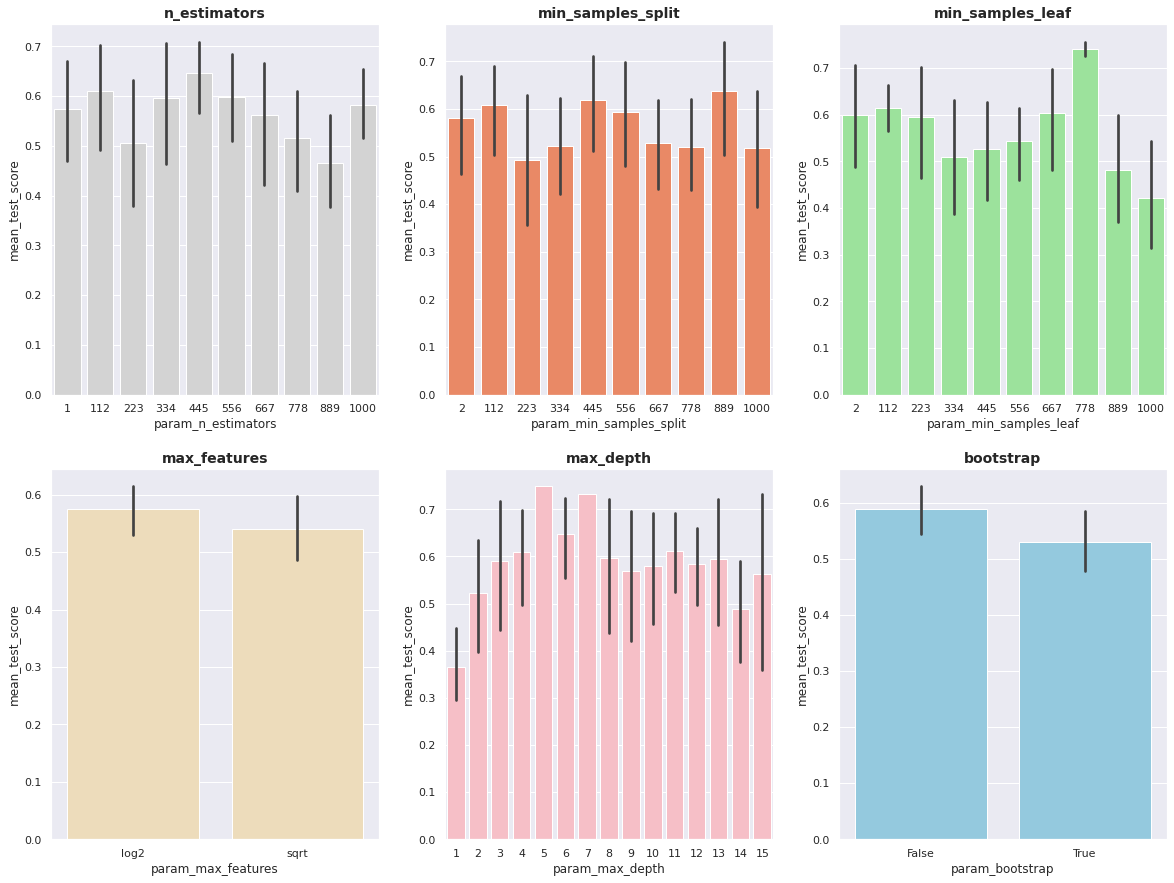

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True,font_scale=1)
fig.set_size_inches(20,15)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_title(label = 'n_estimators', size=14, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_title(label = 'min_samples_split', size=14, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_title(label = 'min_samples_leaf', size=14, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_title(label = 'max_features', size=14, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_title(label = 'max_depth', size=14, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_title(label = 'bootstrap', size=14, weight='bold')

plt.show()

We see that RandomizedSearchCV proposes the variant for each parameter.
We could use the best for further research with GridSearchCV. The values chosen for GridSearchCV are not the max but from several the best. So now we can take these insights and move into the second round of hyperparameters tuning to further narrow our selections.

Now, we will adjust the results with GridSearchCV, which comprehensively checks every proposed combination of hyperparameter values to determine the optimal combination. 
The hyperparameters are the same, but now we perform a more “exhaustive” search using GridSearchCV. In GridSearchCV, every single combination of hyperparameter values is tried which takes much more computational power than RandomSearchCV, where we can directly control how many iterations we want to try. So here we are performing 3-fold cross-validation for 4x 1 x 4x 3 x 3 x 1x 1 = 144 model fits, which is a grand total of 432 model fits.

In [ ]:
# Looking at the plots above, we can extract insights about how well each value for each hyperparameter performed on average.
from sklearn.model_selection import GridSearchCV
n_estimators = [112,334,445,1000]
max_features = ['log2']
max_depth = [5,7,13,15]
min_samples_split = [112, 445, 889]
min_samples_leaf = [2, 223, 778]
bootstrap = [False]
class_weight= [{0: 1, 1: 2}]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight':class_weight}
gs = GridSearchCV(rf, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train, y_train)
rf1 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


{'bootstrap': False,
 'class_weight': {0: 1, 1: 2},
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 778,
 'min_samples_split': 112,
 'n_estimators': 445}

**PERFORMANCES COMPARISON**

Now we will generate scores of all variant of Random Forest tested:
*   Random forest (default hyperparameters)
*   Random forest with optimized hyperparameters

In [ ]:
#Let’s generate the predictions of each of these models:
#Random Forest basic  __ rf
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
#Random Forest fitted   __ gs.best_estimator_
y_pred_gs = gs.best_estimator_.predict(X_test)



In [ ]:
print("_________ Random Forest _________")
print(classification_report(y_test, y_pred_rf))
print("_________Confusion_matrix: TP / TN / FP/ FN _________")
cm= pd.crosstab(y_test, y_pred_rf, rownames=['Real Class'], colnames=['Predicted Class'])
print(cm )
print("__________________")
print("Accuracy:how often is the classifier correct",  "%.2f" % accuracy_score(y_test, y_pred_rf))
print("f1:performance, based on two factors i.e. precision and recall.","%.2f" %f1_score(y_test, y_pred_rf))

print("_________Random Forest BEST PARAMETERS _________")
print(classification_report(y_test, y_pred_gs))
print("_________Confusion_matrix: TP / TN / FP/ FN _________")
cm= pd.crosstab(y_test, y_pred_gs, rownames=['Real Class'], colnames=['Predicted Class'])
print(cm )
print("__________________")
print("Accuracy:how often is the classifier correct",  "%.2f" % accuracy_score(y_test, y_pred_gs))
print("f1:performance, based on two factors i.e. precision and recall.","%.2f" %f1_score(y_test, y_pred_gs))


_________ Random Forest _________
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       884
           1       0.60      0.47      0.53       312

    accuracy                           0.78      1196
   macro avg       0.71      0.68      0.69      1196
weighted avg       0.77      0.78      0.77      1196

_________Confusion_matrix: TP / TN / FP/ FN _________
Classe prédite    0    1
Classe réelle           
0               786   98
1               164  148
__________________
Accuracy:how often is the classifier correct 0.78
f1:performance, based on two factors i.e. precision and recall. 0.53
_________Random Forest BEST PARAMETRES _________
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       884
           1       0.54      0.70      0.61       312

    accuracy                           0.77      1196
   macro avg       0.71      0.75      0.72      1196
weighted avg       0.79   

NOTE:
The model without overfitting performs the best.
The fitting of parameters makes the results better, especially for 'churn', those client who will leave.




---



---



**METHOD #2 : Hyperparameters tuning on beforehand balanced dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2,random_state=42)



---

Reminder of results obtained using the oversampled dataset with the Random Forest Classifier (default hyperparameters values) 

In [ ]:
model = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))
model.fit(X_train, y_train) 
y_predict_model = model.predict(X_test)

pd.crosstab(y_test, y_predict_model, rownames = ['Churn'], colnames = ['Prediction'])

Prediction,No,Yes
Churn,,
No,720,153
Yes,36,847


In [ ]:
report_rf = classification_report(y_test, y_predict_model)
print(report_rf)

              precision    recall  f1-score   support

          No       0.95      0.82      0.88       873
         Yes       0.85      0.96      0.90       883

    accuracy                           0.89      1756
   macro avg       0.90      0.89      0.89      1756
weighted avg       0.90      0.89      0.89      1756



In [ ]:
accuracyScore_rf_over_noTuning = accuracy_score(y_test, y_predict_model)
print("Accuracy score with balanced dataset and without optimization is :",  "%.4f" % accuracyScore_rf_over_noTuning)

Accuracy score with balanced dataset and without optimization is : 0.8924




---

Configuration of the hyperparameters distributions for hyperparameters optimization

To note that the dataset is already balanced by the oversampling, so the hyperparameter "class_weigth" is not tuned here

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

criterion = ['gini', 'entropy', 'log_loss']

# Number of features to consider at every split
max_features = ['log2', 'sqrt', None]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [1,2,5,10] 

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10] 

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Pretty display of a dictionary 
import json
pretty = json.dumps(random_grid, indent=4)
print(pretty)              

{
    "criterion": [
        "gini",
        "entropy",
        "log_loss"
    ],
    "n_estimators": [
        100,
        200,
        300,
        400,
        500,
        600,
        700,
        800,
        900,
        1000
    ],
    "max_features": [
        "log2",
        "sqrt",
        null
    ],
    "max_depth": [
        10,
        20,
        30,
        40,
        50,
        60,
        70,
        80,
        90,
        100,
        null
    ],
    "min_samples_split": [
        1,
        2,
        5,
        10
    ],
    "min_samples_leaf": [
        1,
        2,
        5,
        10
    ],
    "bootstrap": [
        true,
        false
    ]
}




---

Configuration of the Randomized Search algorithm

In [ ]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=42), 
                               param_distributions = random_grid, 
                               scoring = 'accuracy',
                               n_iter = 100, 
                               cv = StratifiedKFold(n_splits=5), 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)



---


Results obtained using the oversampled dataset with the Random Forest Classifier (optimized hyperparameters values) 

In [ ]:
model = make_pipeline(preprocessor, rf_random)
model.fit(X_train, y_train) 
y_predict_model = model.predict(X_test)

pd.crosstab(y_test, y_predict_model, rownames = ['Churn'], colnames = ['Prediction'])

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Prediction,No,Yes
Churn,,
No,746,127
Yes,42,841


In [ ]:
report_rf_random = classification_report(y_test, y_predict_model)
print(report_rf_random)

              precision    recall  f1-score   support

          No       0.95      0.85      0.90       873
         Yes       0.87      0.95      0.91       883

    accuracy                           0.90      1756
   macro avg       0.91      0.90      0.90      1756
weighted avg       0.91      0.90      0.90      1756



In [ ]:
accuracyScore_rf_over_withTuning = accuracy_score(y_test, y_predict_model)
print("Accuracy score with balanced dataset and optimization is :",  "%.4f" % accuracyScore_rf_over_withTuning) 

Accuracy score with balanced dataset and optimization is : 0.9038


Display optimization results

In [ ]:
# Get the parameter names and display parameter values for the 5 best scores
column_results = [f"param_{name}" for name in rf_random.param_distributions.keys()]
column_results += ["mean_test_score", "std_test_score", "rank_test_score"]

cv_results= pd.DataFrame(rf_random.cv_results_).sort_values(by='rank_test_score', ascending=True)
cv_results = cv_results[column_results].sort_values("mean_test_score", ascending=False)

cv_results['index'] = cv_results.index
cv_results.head(5)

,param_criterion,param_n_estimators,param_max_features,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_bootstrap,mean_test_score,std_test_score,rank_test_score,index
61,entropy,800,sqrt,20,2,1,False,0.877099,0.005052,1,61
72,entropy,1000,log2,None,2,1,False,0.876673,0.001947,2,72
65,entropy,400,sqrt,None,2,1,True,0.867844,0.005215,3,65
41,gini,800,None,60,5,1,True,0.863999,0.008502,4,41
37,entropy,900,sqrt,100,2,2,False,0.863998,0.006130,5,37


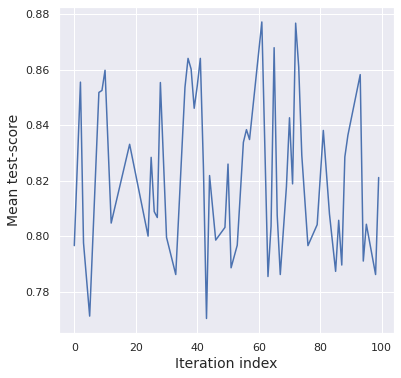

In [ ]:
# Display the lineplot of the mean_test_score overall iterations of the RandomizedSearchCV algorithm
sns.set()
plt.figure(figsize=(6,6))
ax = plt.subplot()
sns.lineplot(data=cv_results, x=cv_results['index'], y=cv_results['mean_test_score'])
ax.set_xlabel("Iteration index", fontsize = 14)
ax.set_ylabel("Mean test-score",fontsize=14)
plt.show()

In [ ]:
# Compare f1-score accuracy before and after optimization
percentRatioChange = 100*(accuracyScore_rf_over_withTuning-accuracyScore_rf_over_noTuning)/accuracyScore_rf_over_noTuning
print('Improvement of the f1-score (after optimization) is : {:0.1f}%.'.format(percentRatioChange))

Improvement of the f1-score (after optimization) is : 1.3%.




---



---



**CONCLUSION**

We have presented a churn prediction machine learning project. We classically constructed our analysis by going through the data audit, exploration and cleaning to the training and evaluation of the machine learning models, and passing by the data visualization. After removing unrelevant information (some observations and features), we performed the model training and optimization following two approaches: 1) Data balancing using the class_weight hyperparameter among others 2) Data balancing using oversampling technique (without use of class-weighting as tunable hyperparameter). In the majority of cases, all models have shown good results(>73.4% which is the low threshold -> percent of customer which do not have resiliated their contract). The best results have been obtained using a beforehand oversampled dataset and the Random Forest Classifier after hyperparameters optimization with a f1-score accuracy of 0.90. That is means the model configuration used is efficient. In the present case, the class-weight tuning do not lead to an significant improvement of the model training.   